In [1]:
!pip install kaggle --upgrade
!pip install -U kaleido

import os
os.environ['KAGGLE_USERNAME'] = 'hardm00n'
os.environ['KAGGLE_KEY'] = '705411ac0f42b6a6e137b07cfb0b188e'

!kaggle datasets download -d shivamb/netflix-shows
!unzip '*.zip'

     |████████████████████████████████| 79.9 MB 104 kB/s 
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 23.4MB/s]
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [2]:
!ls

netflix-shows.zip  netflix_titles.csv  sample_data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plotly : 시각화 라이브러리, 그래프가 타 라이브러리에 비해 아름답다.
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/netflix_titles.csv')
print(data.shape)
data.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
data['country'] = data['country'].fillna(data['country'].mode()[0])  # 최빈값으로 결측치 대체
#data['director'].replace(np.nan, 'No Data', inplace=True)  # 감독 결측치는 'No Data'로 일단은 대체 -> 결측치 제거로 변경!
data.dropna(inplace=True) # 기타 결측치 제거
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [7]:
import datetime

data['date_added'] = pd.to_datetime(data['date_added'])
data['month'] = data['date_added'].dt.month

In [8]:
data['season'] = 0
data.loc[(data['month'] < 3) | (data['month'] == 12), 'season'] = 'Winter'
data.loc[(data['month'] >= 3) & (data['month'] < 6), 'season'] = 'Spring'
data.loc[(data['month'] >= 6) & (data['month'] < 9), 'season'] = 'Summer'
data.loc[(data['month'] >= 9) & (data['month'] < 12), 'season'] = 'Autumn'
data = data.drop(['date_added', 'month', 'cast', 'description'], axis=1)

In [9]:
data


,show_id,type,title,director,country,release_year,rating,duration,listed_in,season
2,s3,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Autumn
5,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",Autumn
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021,PG,91 min,Children & Family Movies,Autumn
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Autumn
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",Autumn
...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Spring
8802,s8803,Movie,Zodiac,David Fincher,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",Autumn
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2009,R,88 min,"Comedies, Horror Movies",Autumn
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2006,PG,88 min,"Children & Family Movies, Comedies",Winter


## 계절별 director 분석

- `date_added`의 month를 기준으로 4계절을 나누었고, 계절별로 데이터셋의 각 컬럼별 상관 관계를 알아보고자 한다.   
- 여기서는 계절과 `director` 컬럼의 상관 관계에 대해 살펴보자.

In [10]:
data['season'].value_counts()

Summer    1483
Autumn    1449
Spring    1401
Winter    1363
Name: season, dtype: int64

- 우선 데이터셋의 각 계절별 작품 수를 확인해보면 대략 1400개 정도로 제법 골고루 분포한 것을 확인할 수 있다. 

In [11]:
data['director'].nunique()

4150

In [12]:
data['director']

2                     Julien Leclercq
5                       Mike Flanagan
6       Robert Cullen, José Luis Ucha
7                        Haile Gerima
8                     Andy Devonshire
                    ...              
8801                  Majid Al Ansari
8802                    David Fincher
8804                  Ruben Fleischer
8805                     Peter Hewitt
8806                      Mozez Singh
Name: director, Length: 5696, dtype: object

- 데이터셋에 포함된 감독의 수는 표면적으로 4150명으로 나타났다.
- 그러나 실제 데이터를 살펴보면 한 작품에 여러 명의 감독이 쉼표로 구분되어 등재된 경우도 있기 때문에 이는 정확한 수치가 아니다. 

In [13]:
data['director'] = data['director'].apply(lambda x: x.split(",")[0])
data['director']

2       Julien Leclercq
5         Mike Flanagan
6         Robert Cullen
7          Haile Gerima
8       Andy Devonshire
             ...       
8801    Majid Al Ansari
8802      David Fincher
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 5696, dtype: object

In [14]:
data['director'].nunique()

4050

- 여러 감독이 존재할 경우 가장 맨 앞에 등재된 감독을 작품을 대표하는 감독으로 간주했다.
- 따라서 데이터셋에 포함된 감독의 수는 4050명으로 볼 수 있다. 

In [15]:
dir_freq = data['director'].value_counts()
dir_freq

Rajiv Chilaka      19
Raúl Campos        18
Marcus Raboy       16
Jay Karas          15
Suhas Kadav        13
                   ..
Julien Abraham      1
Monika Mitchell     1
Eva Orner           1
KVR Mahendra        1
Mozez Singh         1
Name: director, Length: 4050, dtype: int64

In [16]:
graph = [go.Bar(
    x=dir_freq.head(20).index,
    y=dir_freq.head(20),
    width=0.5,
    opacity=0.6  # 불투명도
)]

layout = go.Layout(
    autosize=True,
    title='Netflix 데이터셋에서 가장 많은 작품을 한 감독 Top 20',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=False
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

In [17]:
dir_freq_spring = data.loc[data['season'] == 'Spring', 'director'].value_counts()
dir_freq_summer = data.loc[data['season'] == 'Summer', 'director'].value_counts()
dir_freq_autumn = data.loc[data['season'] == 'Autumn', 'director'].value_counts()
dir_freq_winter = data.loc[data['season'] == 'Winter', 'director'].value_counts()

In [18]:
graph = [go.Bar(
    x=dir_freq_spring.head(20).index,
    y=dir_freq_spring.head(20),
    width=0.5,
    marker=dict(
        color=dir_freq_spring.head(20),
        colorscale='Portland',
        reversescale=False  # 색상 스케일이 반전된다.
    ),
    opacity=0.6  # 불투명도
)]

layout = go.Layout(
    autosize=True,
    title='봄에 가장 많은 작품이 등록된 감독 Top 20',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=False
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

In [19]:
graph = [go.Bar(
    x=dir_freq_summer.head(20).index,
    y=dir_freq_summer.head(20),
    width=0.5,
    marker=dict(
        color=dir_freq_summer.head(20),
        colorscale='Portland',
        reversescale=False  # 색상 스케일이 반전된다.
    ),
    opacity=0.6  # 불투명도
)]

layout = go.Layout(
    autosize=True,
    title='여름에 가장 많은 작품이 등록된 감독 Top 20',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=False
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

In [20]:
graph = [go.Bar(
    x=dir_freq_autumn.head(20).index,
    y=dir_freq_autumn.head(20),
    width=0.5,
    marker=dict(
        color=dir_freq_autumn.head(20),
        colorscale='Portland',
        reversescale=False  # 색상 스케일이 반전된다.
    ),
    opacity=0.6  # 불투명도
)]

layout = go.Layout(
    autosize=True,
    title='가을에 가장 많은 작품이 등록된 감독 Top 20',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=False
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

In [21]:
graph = [go.Bar(
    x=dir_freq_winter.head(20).index,
    y=dir_freq_winter.head(20),
    width=0.5,
    marker=dict(
        color=dir_freq_winter.head(20),
        colorscale='Portland',
        reversescale=False  # 색상 스케일이 반전된다.
    ),
    opacity=0.6  # 불투명도
)]

layout = go.Layout(
    autosize=True,
    title='겨울에 가장 많은 작품이 등록된 감독 Top 20',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=False
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

- 각 계절별 가장 많은 작품이 등록된 감독 Top 20을 살펴보았다. 
- 생각보다 특정 계절에 여러 작품이 등록된 감독이 많은 것으로 보인다.

In [22]:
data['season'].unique()

array(['Autumn', 'Summer', 'Spring', 'Winter'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['season'])
data['encoded_season'] = le.transform(data['season'])
le.fit(data['director'])
data['encoded_director'] = le.transform(data['director'])
data.head()

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director
2,s3,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Autumn,0,1867
5,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",Autumn,0,2541
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,United States,2021,PG,91 min,Children & Family Movies,Autumn,0,3166
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Autumn,0,1339
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",Autumn,0,263


- `season` 컬럼과 `director` 컬럼의 상관관계를 확인하기 위해 각 컬럼을 라벨 인코딩했다. 
- 추가로, 작품의 장르를 의미하는 `listed_in` 컬럼과 감독, 계절의 상관관계도 궁금해서 확인해보기로 했다. 
- 장르의 경우 감독명처럼 하나의 작품이 다수의 장르에 속하는 경우가 대부분이기에 맨 앞 장르를 대표 장르로 간주했다. 

In [24]:
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(",")[0])
le.fit(data['listed_in'])
data['encoded_listed_in'] = le.transform(data['listed_in'])
data.head()

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
2,s3,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,Crime TV Shows,Autumn,0,1867,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,TV Dramas,Autumn,0,2541,29
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,United States,2021,PG,91 min,Children & Family Movies,Autumn,0,3166,4
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,Dramas,Autumn,0,1339,12
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons,British TV Shows,Autumn,0,263,3


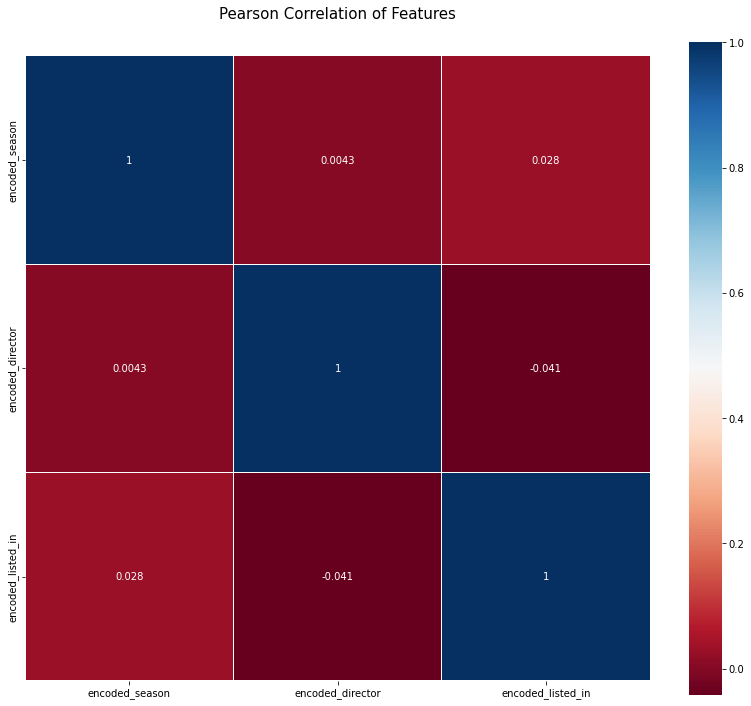

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data[['encoded_season', 'encoded_director', 'encoded_listed_in']].astype(float).corr(), linewidth=0.1,  # linewidth : 히트맵 블록 사이 경계선
            vmax=1.0, square=True, cmap=colormap,  # vmax : 색으로 표현하는 최대값, square : 차트를 정사각형으로 할 것인지
            linecolor='white', annot=True)  # annot : 블록의 숫자 표시

- Heatmap을 그려보니 생각보다 계절과 감독과의 상관도가 많이 낮게 나왔다... 음...
- 아마 현재 계절을 나눈 것이 우리나라의 계절을 기준으로 나눴고, 넷플릭스 데이터셋은 전 세계의 데이터셋이다 보니 각 국가별 계절이 달라서 상관관계가 낮게 나온건가 하는 생각이 든다. 
- 국가별로 분리해서 다시 계절별로 살펴볼 필요가 있을 것 같다. 
- 장르의 경우 한 작품이 여러 장르에 속하는데 맨 앞의 장르를 대표 장르로 설정하는 과정에서 한 작품에 대한 장르의 특성이 많이 희석된 것으로 보인다. 이는 한 작품이 속하는 모든 장르를 다 고려할 수 있도록 새롭게 분석해봐야할 것 같다. 

In [26]:
country_freq = data['country'].value_counts()
country_freq.head(10)

United States     2210
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: country, dtype: int64

In [27]:
graph = [go.Bar(
    x=country_freq.head(10).index,
    y=country_freq.head(10),
    width=0.5,
    marker=dict(
        color=dir_freq_winter.head(20),
        colorscale='Portland',
        reversescale=False  # 색상 스케일이 반전된다.
    ),
    opacity=0.6  # 불투명도
)]

layout = go.Layout(
    autosize=True,
    title='가장 많은 작품이 속한 국가 Top 10',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=False
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

- 가장 많은 작품이 속한 국가를 살펴보니 미국이 2210개로 압도적이었고, 그 뒤로 인도, 영국 등의 순서였다. 
- 미국의 경우 계절이 우리나라와 유사하기에 처음에 `season` 컬럼을 만든 기준에는 부합하는 것 같다. 
- 각 계절별로 여러 작품을 냈던 감독들의 국가를 확인해봐야겠다. 

### 봄에 가장 많은 작품이 등록된 감독들 살펴보기

In [28]:
data.loc[(data['director'] == 'Suhas Kadav') & (data['season'] == 'Spring'), 'listed_in'].value_counts()

Children & Family Movies    12
Name: listed_in, dtype: int64

In [29]:
data[data['director'] == 'Suhas Kadav']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
937,s938,Movie,Motu Patlu in Dragon's World,Suhas Kadav,United States,2017,TV-Y7,78 min,Children & Family Movies,Spring,1,3614,4
938,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,United States,2019,TV-Y7,87 min,Children & Family Movies,Spring,1,3614,4
939,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,United States,2013,TV-Y7,76 min,Children & Family Movies,Spring,1,3614,4
940,s941,Movie,Motu Patlu: Deep Sea Adventure,Suhas Kadav,United States,2014,TV-Y7,76 min,Children & Family Movies,Spring,1,3614,4
941,s942,Movie,Motu Patlu: Mission Moon,Suhas Kadav,United States,2013,TV-Y7,71 min,Children & Family Movies,Spring,1,3614,4
1006,s1007,Movie,Motu Patlu Dino Invasion,Suhas Kadav,United States,2018,TV-Y7,80 min,Children & Family Movies,Spring,1,3614,4
1007,s1008,Movie,Motu Patlu in Octupus World,Suhas Kadav,United States,2017,TV-Y,81 min,Children & Family Movies,Spring,1,3614,4
1008,s1009,Movie,Motu Patlu VS Robo Kids,Suhas Kadav,United States,2019,TV-Y,84 min,Children & Family Movies,Spring,1,3614,4
1071,s1072,Movie,Motu Patlu in Hong Kong: Kung Fu Kings 3,Suhas Kadav,United States,2017,TV-Y7,84 min,Children & Family Movies,Spring,1,3614,4
1072,s1073,Movie,Motu Patlu in the City of Gold,Suhas Kadav,United States,2018,TV-Y7,77 min,Children & Family Movies,Spring,1,3614,4


In [30]:
data[data['director'] == 'Yılmaz Erdoğan']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
906,s907,Movie,Have You Ever Seen Fireflies? - Theatre Play,Yılmaz Erdoğan,Turkey,1999,TV-MA,118 min,Dramas,Spring,1,4016,12
995,s996,Movie,Vizontele,Yılmaz Erdoğan,Turkey,2001,TV-MA,106 min,Comedies,Spring,1,4016,7
2605,s2606,Movie,Ekşi Elmalar,Yılmaz Erdoğan,Turkey,2016,TV-PG,109 min,Dramas,Spring,1,4016,12
2620,s2621,Movie,Neseli Hayat,Yılmaz Erdoğan,Turkey,2009,TV-14,108 min,Comedies,Spring,1,4016,7
2621,s2622,Movie,Organize Isler,Yılmaz Erdoğan,Turkey,2005,TV-14,104 min,Action & Adventure,Spring,1,4016,0
3402,s3403,Movie,"Love, Surreal and Odd",Yılmaz Erdoğan,Turkey,2017,TV-14,95 min,Comedies,Autumn,0,4016,7
3889,s3890,Movie,Money Trap,Yılmaz Erdoğan,Turkey,2019,TV-MA,122 min,Comedies,Spring,1,4016,7
5581,s5582,Movie,The Butterfly's Dream,Yılmaz Erdoğan,Turkey,2013,TV-PG,118 min,Dramas,Spring,1,4016,12
8682,s8683,Movie,Vizontele Tuuba,Yılmaz Erdoğan,Turkey,2004,NR,106 min,Comedies,Spring,1,4016,7


In [31]:
data[data['director'] == 'Fernando Ayllón']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
1164,s1165,Movie,Ni de coña,Fernando Ayllón,Spain,2020,TV-MA,97 min,Comedies,Spring,1,1140,7
2567,s2568,Movie,Death Can Wait,Fernando Ayllón,Colombia,2020,TV-14,91 min,Comedies,Spring,1,1140,7
3138,s3139,Movie,Holy Expectations,Fernando Ayllón,United States,2019,TV-14,89 min,Children & Family Movies,Winter,3,1140,4
3548,s3549,Movie,Feo pero sabroso,Fernando Ayllón,Colombia,2018,TV-MA,91 min,Comedies,Summer,2,1140,7
3888,s3889,Movie,Loving is Losing,Fernando Ayllón,Colombia,2019,TV-MA,91 min,Comedies,Spring,1,1140,7
3929,s3930,Movie,Liss Pereira: Reteniendo líquidos,Fernando Ayllón,Brazil,2019,TV-14,59 min,Stand-Up Comedy,Spring,1,1140,25
3947,s3948,Movie,Ricardo Quevedo: Los amargados somos más,Fernando Ayllón,United States,2019,TV-MA,59 min,Stand-Up Comedy,Spring,1,1140,25
4883,s4884,Movie,Si saben cómo me pongo ¿pá qué me invitan?,Fernando Ayllón,Colombia,2018,TV-MA,89 min,Comedies,Spring,1,1140,7


In [32]:
graph = [go.Pie(
    labels=data.loc[((data['director'] == 'Fernando Ayllón') | (data['director'] == 'Suhas Kadav') | (data['director'] == 'Yılmaz Erdoğan')) & (data['season'] == 'Spring'), 'listed_in'].value_counts().index,
    values=data.loc[((data['director'] == 'Fernando Ayllón') | (data['director'] == 'Suhas Kadav') | (data['director'] == 'Yılmaz Erdoğan')) & (data['season'] == 'Spring'), 'listed_in'].value_counts(),
    hole=.3
)]

layout = go.Layout(
    autosize=True,
    title='봄에 가장 많은 작품이 등록된 Top 3 감독들의 작품 장르',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=True
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

In [33]:
graph = [go.Pie(
    labels=data.loc[((data['director'] == 'Fernando Ayllón') | (data['director'] == 'Suhas Kadav') | (data['director'] == 'Yılmaz Erdoğan')) & (data['season'] == 'Spring'), 'rating'].value_counts().index,
    values=data.loc[((data['director'] == 'Fernando Ayllón') | (data['director'] == 'Suhas Kadav') | (data['director'] == 'Yılmaz Erdoğan')) & (data['season'] == 'Spring'), 'rating'].value_counts(),
    hole=.3
)]

layout = go.Layout(
    autosize=True,
    title='봄에 가장 많은 작품이 등록된 Top 3 감독들의 작품 등급',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=True
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

- 봄에 가장 많은 작품이 등록된 감독 3명에 대해 살펴보았다. 
- 12개의 작품이 등록된 Suhas Kadav의 경우, 작품의 모든 장르가 어린이 및 가족 영화였다. 
- Heatmap에서 상관계수는 낮게 나왔더라도 어느 정도 특정 감독이 특정 장르 위주로 작품을 내는 것 같다. 
- 8개의 작품이 등록된 Yılmaz Erdoğan의 경우, 대부분의 장르가 드라마와 코미디 영화였다. 
- 6개의 작품이 등록된 감독은 많았는데, 그 중 Fernando Ayllón의 경우, 대부분의 작품이 코미디, 어린이 및 가족 영화였다. 
- 위 감독들의 국가는 미국 및 터키로, 위도가 대체로 우리나라와 비슷해 비슷한 계절을 갖는다.
- 대체로 봄에 가장 많이 등록된 감독의 작품들은 어린이 및 가족 영화, 코미디 영화인 것을 알 수 있다. 

### 여름에 가장 많은 작품이 등록된 감독들 살펴보기

In [34]:
data[data['director'] == 'Rajiv Chilaka']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,United States,2013,TV-Y7,64 min,Children & Family Movies,Summer,2,3028,4
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,United States,2009,TV-Y7,68 min,Children & Family Movies,Summer,2,3028,4
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,United States,2011,TV-Y7,67 min,Children & Family Movies,Summer,2,3028,4
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,United States,2010,TV-Y7,66 min,Children & Family Movies,Summer,2,3028,4
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,India,2013,TV-Y7,64 min,Children & Family Movies,Summer,2,3028,4
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,United States,2013,TV-Y7,64 min,Children & Family Movies,Summer,2,3028,4
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,United States,2013,TV-Y7,65 min,Children & Family Movies,Summer,2,3028,4
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,United States,2013,TV-Y7,64 min,Children & Family Movies,Summer,2,3028,4
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,United States,2012,TV-Y7,68 min,Children & Family Movies,Summer,2,3028,4
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,India,2009,TV-Y7,68 min,Children & Family Movies,Summer,2,3028,4


In [35]:
data[data['director'] == 'Youssef Chahine']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
529,s530,Movie,Return of the Prodigal Son,Youssef Chahine,Egypt,1976,TV-MA,124 min,Dramas,Summer,2,4005,12
2354,s2355,Movie,Destiny,Youssef Chahine,"France, Egypt",1997,TV-14,136 min,Dramas,Summer,2,4005,12
2361,s2362,Movie,The Emigrant,Youssef Chahine,"Egypt, France",1994,TV-14,130 min,Dramas,Summer,2,4005,12
2365,s2366,Movie,Alexandria ... Why?,Youssef Chahine,"Egypt, Algeria",1979,TV-MA,131 min,Classic Movies,Summer,2,4005,6
2366,s2367,Movie,Alexandria: Again and Forever,Youssef Chahine,"France, Egypt",1989,TV-MA,109 min,Classic Movies,Summer,2,4005,6
2367,s2368,Movie,An Egyptian Story,Youssef Chahine,Egypt,1982,TV-MA,129 min,Classic Movies,Summer,2,4005,6
2368,s2369,Movie,Cairo Station,Youssef Chahine,Egypt,1958,TV-14,73 min,Classic Movies,Summer,2,4005,6
2369,s2370,Movie,Dark Waters,Youssef Chahine,Egypt,1956,TV-14,104 min,Classic Movies,Summer,2,4005,6
2373,s2374,Movie,Saladin,Youssef Chahine,Egypt,1963,TV-MA,194 min,Action & Adventure,Summer,2,4005,0
2375,s2376,Movie,The Blazing Sun,Youssef Chahine,Egypt,1954,TV-14,116 min,Classic Movies,Summer,2,4005,6


In [36]:
data[data['director'] == 'Jay Chapman']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
3645,s3646,Movie,D.L. Hughley: Contrarian,Jay Chapman,United States,2018,TV-MA,58 min,Stand-Up Comedy,Summer,2,1592,25
4222,s4223,Movie,Moshe Kasher: Live in Oakland,Jay Chapman,United States,2012,TV-MA,61 min,Stand-Up Comedy,Winter,3,1592,25
4248,s4249,Movie,Todd Glass: Stand-Up Special,Jay Chapman,United States,2012,TV-MA,46 min,Stand-Up Comedy,Winter,3,1592,25
5108,s5109,Movie,Todd Barry: Spicy Honey,Jay Chapman,United States,2017,TV-MA,61 min,Stand-Up Comedy,Winter,3,1592,25
5134,s5135,Movie,Craig Ferguson: Tickle Fight,Jay Chapman,United States,2017,TV-MA,67 min,Stand-Up Comedy,Winter,3,1592,25
5325,s5326,Movie,Brad Paisley's Comedy Rodeo,Jay Chapman,United States,2017,TV-MA,63 min,Music & Musicals,Summer,2,1592,20
5326,s5327,Movie,Colin Quinn: Unconstitutional,Jay Chapman,United States,2015,TV-MA,56 min,Stand-Up Comedy,Summer,2,1592,25
5378,s5379,Movie,D.L. Hughley: Clear,Jay Chapman,United States,2014,TV-MA,59 min,Stand-Up Comedy,Summer,2,1592,25
5379,s5380,Movie,Tom Segura: Completely Normal,Jay Chapman,United States,2014,TV-MA,74 min,Stand-Up Comedy,Summer,2,1592,25
5525,s5526,Movie,Lucas Brothers: On Drugs,Jay Chapman,United States,2017,TV-MA,50 min,Stand-Up Comedy,Spring,1,1592,25


In [37]:
graph = [go.Pie(
    labels=data.loc[((data['director'] == 'Rajiv Chilaka') | (data['director'] == 'Youssef Chahine') | (data['director'] == 'Jay Chapman')) & (data['season'] == 'Summer'), 'listed_in'].value_counts().index,
    values=data.loc[((data['director'] == 'Rajiv Chilaka') | (data['director'] == 'Youssef Chahine') | (data['director'] == 'Jay Chapman')) & (data['season'] == 'Summer'), 'listed_in'].value_counts(),
    hole=.3
)]

layout = go.Layout(
    autosize=True,
    title='여름에 가장 많은 작품이 등록된 Top 3 감독들의 작품 장르',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=True
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

In [38]:
graph = [go.Pie(
    labels=data.loc[((data['director'] == 'Rajiv Chilaka') | (data['director'] == 'Youssef Chahine') | (data['director'] == 'Jay Chapman')) & (data['season'] == 'Summer'), 'rating'].value_counts().index,
    values=data.loc[((data['director'] == 'Rajiv Chilaka') | (data['director'] == 'Youssef Chahine') | (data['director'] == 'Jay Chapman')) & (data['season'] == 'Summer'), 'rating'].value_counts(),
    hole=.3
)]

layout = go.Layout(
    autosize=True,
    title='여름에 가장 많은 작품이 등록된 Top 3 감독들의 작품 등급',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=True
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

- 여름에 가장 많은 작품이 등록된 감독들을 살펴보면, 무려 18개의 작품이 등록된 Rajiv Chilaka의 모든 작품은 어린이 및 가족 영화였고, 국가는 미국이었다.  
- 11개의 작품이 등록된 Youssef Chahine은, 클래식 영화나 드라마가 주된 장르였고, 국가는 이집트였다. 
- 6개의 작품이 등록된 감독은 많았지만, 그 중 Jay Chapman의 경우 스탠드업 코미디가 주된 장르이고, 국가는 미국이었다. 
- 사실 우리나라의 예로써 직관적으로 추측했을 때, 여름에 액션이나 호러 장르의 작품이 많을 것이라 예상했는데 그것은 아닌 것 같다. 
- 참고로 이집트의 덥고 건조한 사막기후이지만 계절 흐름은 우리나라와 비슷하다고 한다. 

### 가을에 가장 많은 작품이 등록된 감독들 살펴보기

In [39]:
data[data['director'] == 'Toshiya Shinohara']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,Japan,2002,TV-14,99 min,Action & Adventure,Autumn,0,3808,0
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,Japan,2003,TV-14,99 min,Action & Adventure,Autumn,0,3808,0
53,s54,Movie,InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,Japan,2004,TV-PG,88 min,Action & Adventure,Autumn,0,3808,0
54,s55,Movie,InuYasha the Movie: Affections Touching Across...,Toshiya Shinohara,Japan,2001,TV-PG,100 min,Action & Adventure,Autumn,0,3808,0
7088,s7089,Movie,Inuyasha the Movie - L'isola del fuoco scarlatto,Toshiya Shinohara,Japan,2004,TV-PG,88 min,Action & Adventure,Autumn,0,3808,0
7089,s7090,Movie,Inuyasha the Movie - La spada del dominatore d...,Toshiya Shinohara,Japan,2003,TV-14,99 min,Action & Adventure,Autumn,0,3808,0
7090,s7091,Movie,InuYasha: The Movie 2: The Castle Beyond the L...,Toshiya Shinohara,Japan,2002,TV-14,99 min,Action & Adventure,Autumn,0,3808,0


In [40]:
data[data['director'] == 'Kunle Afolayan']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
1725,s1726,Movie,Citation,Kunle Afolayan,Nigeria,2020,TV-MA,151 min,Dramas,Autumn,0,2059,12
2147,s2148,Movie,Diamonds in the Sky,Kunle Afolayan,United States,2018,TV-14,113 min,Dramas,Summer,2,2059,12
5963,s5964,Movie,Oct-01,Kunle Afolayan,Nigeria,2014,TV-14,149 min,Dramas,Autumn,0,2059,12
7478,s7479,Movie,Mokalik (Mechanic),Kunle Afolayan,Nigeria,2019,TV-14,100 min,Dramas,Autumn,0,2059,12
7738,s7739,Movie,Phone Swap,Kunle Afolayan,Nigeria,2012,TV-14,112 min,Comedies,Autumn,0,2059,7
8227,s8228,Movie,The Bridge,Kunle Afolayan,Nigeria,2017,TV-14,119 min,Dramas,Autumn,0,2059,12
8241,s8242,Movie,The CEO,Kunle Afolayan,Nigeria,2016,TV-14,109 min,Dramas,Autumn,0,2059,12
8297,s8298,Movie,The Figurine (Araromire),Kunle Afolayan,Nigeria,2009,TV-14,121 min,Horror Movies,Autumn,0,2059,13


In [41]:
data[data['director'] == 'Justin G. Dyck']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
1691,s1692,Movie,A Very Country Christmas,Justin G. Dyck,"United States, Canada",2017,TV-G,84 min,Music & Musicals,Autumn,0,1894,20
1695,s1696,Movie,Hometown Holiday,Justin G. Dyck,Canada,2018,TV-G,84 min,Romantic Movies,Autumn,0,1894,22
1739,s1740,Movie,Christmas with a Prince,Justin G. Dyck,Canada,2018,TV-PG,86 min,Comedies,Autumn,0,1894,7
4390,s4391,Movie,Christmas Wedding Planner,Justin G. Dyck,Canada,2017,PG,86 min,Comedies,Autumn,0,1894,7
4428,s4429,Movie,Christmas With A View,Justin G. Dyck,Canada,2018,TV-PG,91 min,International Movies,Autumn,0,1894,15
4557,s4558,Movie,A Witches' Ball,Justin G. Dyck,Canada,2017,PG,91 min,Children & Family Movies,Autumn,0,1894,4
4891,s4892,Movie,My Perfect Romance,Justin G. Dyck,Canada,2018,PG,92 min,Comedies,Spring,1,1894,7


In [42]:
graph = [go.Pie(
    labels=data.loc[((data['director'] == 'Toshiya Shinohara') | (data['director'] == 'Kunle Afolayan') | (data['director'] == 'Justin G. Dyck')) & (data['season'] == 'Autumn'), 'listed_in'].value_counts().index,
    values=data.loc[((data['director'] == 'Toshiya Shinohara') | (data['director'] == 'Kunle Afolayan') | (data['director'] == 'Justin G. Dyck')) & (data['season'] == 'Autumn'), 'listed_in'].value_counts(),
    hole=.3
)]

layout = go.Layout(
    autosize=True,
    title='가을에 가장 많은 작품이 등록된 Top 3 감독들의 작품 장르',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=True
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

In [43]:
graph = [go.Pie(
    labels=data.loc[((data['director'] == 'Toshiya Shinohara') | (data['director'] == 'Kunle Afolayan') | (data['director'] == 'Justin G. Dyck')) & (data['season'] == 'Autumn'), 'rating'].value_counts().index,
    values=data.loc[((data['director'] == 'Toshiya Shinohara') | (data['director'] == 'Kunle Afolayan') | (data['director'] == 'Justin G. Dyck')) & (data['season'] == 'Autumn'), 'rating'].value_counts(),
    hole=.3
)]

layout = go.Layout(
    autosize=True,
    title='가을에 가장 많은 작품이 등록된 Top 3 감독들의 작품 등급',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=True
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

- 가을에 7개의 작품이 등록된 Toshiya Shinohara의 경우(무려 이누야샤...) 가을에 등록된 모든 작품의 장르가 액션 및 어드벤처였고, 국가는 일본이다. 
- 마찬가지로 7개의 작품이 등록된 Kunle Afolayan의 경우 주된 장르가 드라마고, 특이하게 호러 영화도 포함되어 있다. 국가는 나이지리아로, 계절이 우리나라와 약간 반대이다. 
- 6개의 작품이 등록된 Justin G. Dyck의 주된 국가는 캐나다로, 코미디 영화, 로맨틱 영화, 뮤지컬 영화, 국제 영화 등 다양한 장르의 영화가 가을에 등록되었다. 

### 겨울에 가장 많은 작품이 등록된 감독들 살펴보기

In [44]:
data[data['director'] == 'Cathy Garcia-Molina']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
1497,s1498,Movie,"Hello, Love, Goodbye",Cathy Garcia-Molina,Philippines,2019,TV-14,117 min,Dramas,Winter,3,613,12
1647,s1648,Movie,Unexpectedly Yours,Cathy Garcia-Molina,Philippines,2017,TV-14,121 min,Comedies,Autumn,0,613,7
1677,s1678,Movie,My Amnesia Girl,Cathy Garcia-Molina,Philippines,2010,TV-14,105 min,International Movies,Autumn,0,613,15
1682,s1683,Movie,Three Words to Forever,Cathy Garcia-Molina,Philippines,2018,TV-G,107 min,Comedies,Autumn,0,613,7
1707,s1708,Movie,A Very Special Love,Cathy Garcia-Molina,Philippines,2008,TV-G,107 min,International Movies,Autumn,0,613,15
1809,s1810,Movie,The Hows of Us,Cathy Garcia-Molina,Philippines,2018,TV-14,120 min,Dramas,Autumn,0,613,12
4021,s4022,Movie,Seven Sundays,Cathy Garcia-Molina,Philippines,2017,TV-MA,128 min,Comedies,Spring,1,613,7
4068,s4069,Movie,A Second Chance,Cathy Garcia-Molina,Philippines,2015,TV-MA,130 min,Dramas,Winter,3,613,12
4073,s4074,Movie,Four Sisters and a Wedding,Cathy Garcia-Molina,Philippines,2013,TV-14,125 min,Comedies,Winter,3,613,7
4074,s4075,Movie,It Takes a Man and a Woman,Cathy Garcia-Molina,Philippines,2013,TV-PG,127 min,Comedies,Winter,3,613,7


In [45]:
data[data['director'] == 'Raúl Campos']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
4749,s4750,Movie,Coco y Raulito: Carrusel de ternura,Raúl Campos,Mexico,2018,TV-MA,57 min,Stand-Up Comedy,Summer,2,3073,25
4781,s4782,Movie,Luciano Mellera: Infantiloide,Raúl Campos,Argentina,2018,TV-14,66 min,Stand-Up Comedy,Summer,2,3073,25
4808,s4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,Raúl Campos,Chile,2018,TV-MA,77 min,Stand-Up Comedy,Summer,2,3073,25
4849,s4850,Movie,Fernando Sanjiao: Hombre,Raúl Campos,Argentina,2018,TV-MA,63 min,Stand-Up Comedy,Spring,1,3073,25
4866,s4867,Movie,Carlos Ballarta: Furia Ñera,Raúl Campos,Mexico,2018,TV-MA,63 min,Stand-Up Comedy,Spring,1,3073,25
4940,s4941,Movie,Todo lo que sería Lucas Lauriente,Raúl Campos,Argentina,2018,TV-MA,78 min,Stand-Up Comedy,Spring,1,3073,25
4962,s4963,Movie,Sofía Niño de Rivera: Selección Natural,Raúl Campos,Mexico,2018,TV-MA,62 min,Stand-Up Comedy,Spring,1,3073,25
5001,s5002,Movie,Malena Pichot: Estupidez compleja,Raúl Campos,Argentina,2018,TV-MA,51 min,Stand-Up Comedy,Spring,1,3073,25
5002,s5003,Movie,Natalia Valdebenito: El especial,Raúl Campos,Chile,2018,TV-MA,69 min,Stand-Up Comedy,Spring,1,3073,25
5062,s5063,Movie,Sebastián Marcelo Wainraich,Raúl Campos,Argentina,2018,TV-MA,49 min,Stand-Up Comedy,Winter,3,3073,25


In [46]:
data[data['director'] == 'Steven Spielberg']

,show_id,type,title,director,country,release_year,rating,duration,listed_in,season,encoded_season,encoded_director,encoded_listed_in
41,s42,Movie,Jaws,Steven Spielberg,United States,1975,PG,124 min,Action & Adventure,Autumn,0,3594,0
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"United States, Canada",2002,PG-13,142 min,Dramas,Summer,2,3594,12
1203,s1204,Movie,The BFG,Steven Spielberg,"United States, India, United Kingdom",2016,PG,118 min,Children & Family Movies,Spring,1,3594,4
7070,s7071,Movie,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,United States,2008,PG-13,123 min,Action & Adventure,Winter,3,3594,0
7071,s7072,Movie,Indiana Jones and the Last Crusade,Steven Spielberg,United States,1989,PG-13,127 min,Action & Adventure,Winter,3,3594,0
7072,s7073,Movie,Indiana Jones and the Raiders of the Lost Ark,Steven Spielberg,United States,1981,PG,116 min,Action & Adventure,Winter,3,3594,0
7073,s7074,Movie,Indiana Jones and the Temple of Doom,Steven Spielberg,United States,1984,PG,119 min,Action & Adventure,Winter,3,3594,0
7308,s7309,Movie,Lincoln,Steven Spielberg,"United States, India",2012,PG-13,150 min,Dramas,Winter,3,3594,12
7957,s7958,Movie,Schindler's List,Steven Spielberg,United States,1993,R,195 min,Classic Movies,Spring,1,3594,6
8184,s8185,Movie,The Adventures of Tintin,Steven Spielberg,"United States, New Zealand, United Kingdom",2011,PG,107 min,Children & Family Movies,Autumn,0,3594,4


In [47]:
graph = [go.Pie(
    labels=data.loc[((data['director'] == 'Cathy Garcia-Molina') | (data['director'] == 'Raúl Campos') | (data['director'] == 'Steven Spielberg')) & (data['season'] == 'Winter'), 'listed_in'].value_counts().index,
    values=data.loc[((data['director'] == 'Cathy Garcia-Molina') | (data['director'] == 'Raúl Campos') | (data['director'] == 'Steven Spielberg')) & (data['season'] == 'Winter'), 'listed_in'].value_counts(),
    hole=.3
)]

layout = go.Layout(
    autosize=True,
    title='겨울에 가장 많은 작품이 등록된 Top 3 감독들의 작품 장르',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=True
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")

In [51]:
graph = [go.Pie(
    labels=data.loc[((data['director'] == 'Cathy Garcia-Molina') | (data['director'] == 'Raúl Campos') | (data['director'] == 'Steven Spielberg')) & (data['season'] == 'Winter'), 'rating'].value_counts().index,
    values=data.loc[((data['director'] == 'Cathy Garcia-Molina') | (data['director'] == 'Raúl Campos') | (data['director'] == 'Steven Spielberg')) & (data['season'] == 'Winter'), 'rating'].value_counts(),
    hole=.3
)]

layout = go.Layout(
    autosize=True,
    title='겨울에 가장 많은 작품이 등록된 Top 3 감독들의 작품 등급',
    hovermode='closest',  # 커서에 가까운 점에 대한 hover 레이블이 나타난다. 
    showlegend=True
)
fig = go.Figure(data=graph, layout=layout)
fig.show(renderer="colab")
fig.show(renderer="notebook_connected")

- 겨울에 7개의 작품이 등록된 Cathy Garcia-Molina의 국가는 필리핀으로, 주로 코미디와 드라마 장르의 영화 작품이 등록되었다. 
- 6개의 작품이 등록된 Raúl Campos의 경우 겨울에 등록된 작품들의 장르는 모두 스탠드업 코미디 영화였고, 국가는 남미의 여러 국가들이었다. 
- 겨울에 5개의 작품이 등록된 Steven Spielberg의 경우 겨울에 등록된 작품은 모두 액션 및 어드벤처 장르(인디아나 존스 시리즈)의 영화임을 알 수 있다. 
- 계절별로 분석해봤을 때 각각 가장 많은 작품이 등록된 3명의 감독에 대한 작품만 살펴봤기에 단편적일 수도 있겠지만, 어느정도 특정 계절에 많이 등록된 감독들의 주된 장르가 대체로 일치하지는 않았다. 
- 이는 장르 컬럼을 맨 앞의 장르를 대표 장르로 사용하도록 데이터를 정제하는 과정에서 일부 특성이 희석됐을 수도 있고, 국가별 계절의 양상이 비슷하더라도 정치적, 문화적 요인 등 다양한 외부 요인으로 인해 계절별 작품에 대한 선호도를 명확하게 알기 힘들기 때문으로 보인다. 

In [49]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']